In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
 
%matplotlib inline

In [2]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
 
# loading dataset into Pandas DataFrame
df_iris = pd.read_csv(iris_url, names=['sepal length','sepal width','petal length','petal width','target'])
 
df_iris.head(15)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


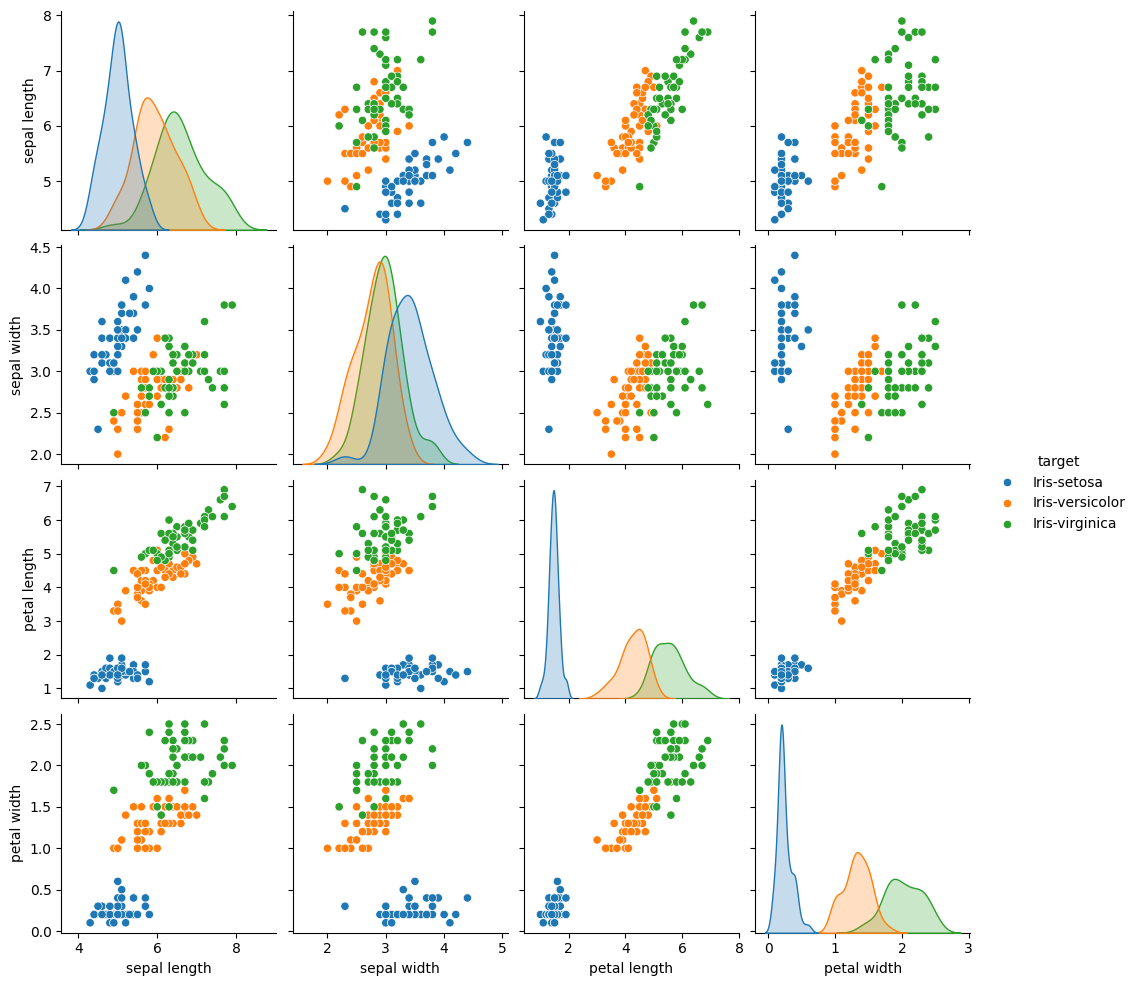

In [3]:
sns.pairplot(df_iris, hue='target')

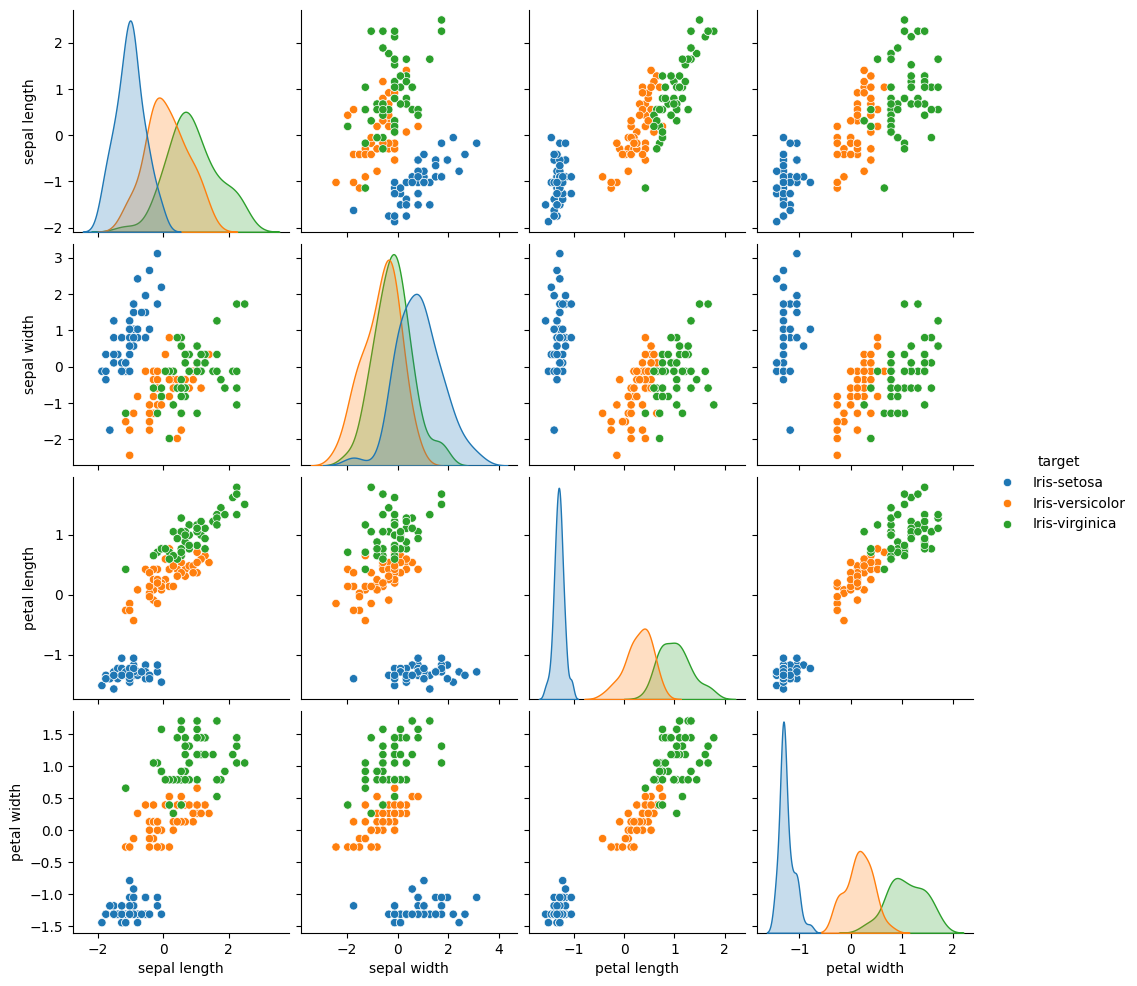

In [4]:
features_iris = ['sepal length', 'sepal width', 'petal length', 'petal width']
x_iris = df_iris.loc[:, features_iris].values
 
y_iris = df_iris.loc[:,['target']].values
 
x_iris = StandardScaler().fit_transform(x_iris)
 
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['target'] = df_iris['target']
df_iris_standarize.head(15)
 
sns.pairplot(df_iris_standarize, hue='target')

In [5]:
pca_iris = PCA(n_components=2)
 
principalComponents_iris = pca_iris.fit_transform(x_iris)
 
principalDf_iris = pd.DataFrame(data = principalComponents_iris, columns = ['principal component 1', 'principal component 2'])
 
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


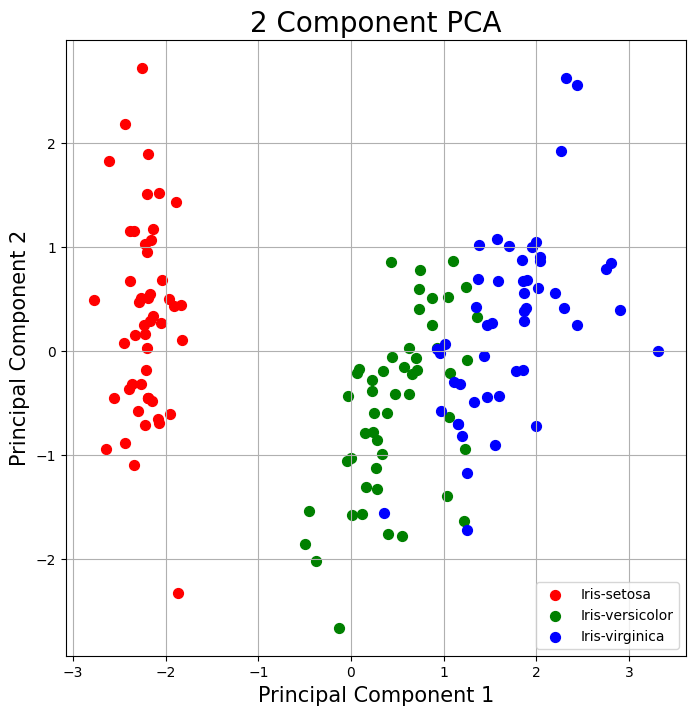

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
 
iris_targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(iris_targets, colors):
    indicesToKeep = finalDf_iris['target'] == target
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(iris_targets)
ax.grid()

In [7]:
pca_iris.explained_variance_ratio_

array([0.72770452, 0.23030523])

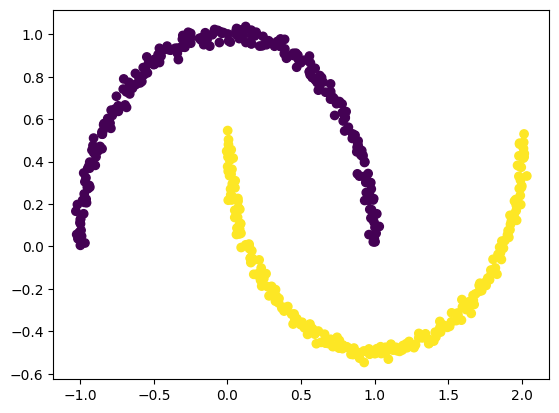

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
 
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)
 
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

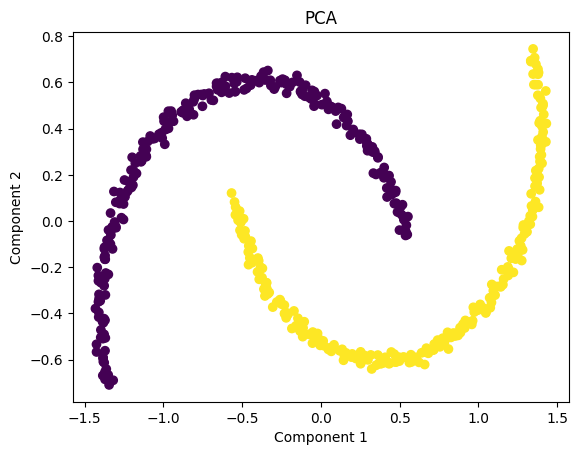

In [9]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
 
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

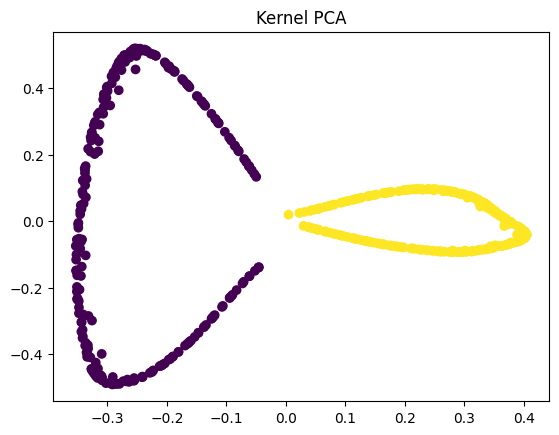

In [10]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)
 
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

In [11]:
# Example of Robust PCA implementation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
 
def robust_pca(X, n_components=2, max_iter=10, tol=1e-7):
    """A simple implementation of Robust PCA"""
    # Initialize
    n, m = X.shape
    L = np.zeros((n, m))
    S = np.zeros((n, m))
 
    mu = 1.0 / np.sqrt(n)
    lam = 1.0 / np.sqrt(n)
 
    for i in range(max_iter):
        # Update L using SVD
        Y = X - S
        U, sigma, Vt = np.linalg.svd(Y, full_matrices=False)
 
        # Apply soft thresholding
        sigma_threshold = np.maximum(sigma - mu, 0)
        r = np.count_nonzero(sigma_threshold)
 
        if r > 0:
            L = U[:, :r] @ np.diag(sigma_threshold[:r]) @ Vt[:r, :]
        else:
            L = np.zeros_like(X)
 
        # Update S using soft thresholding
        Y = X - L
        S = np.sign(Y) * np.maximum(np.abs(Y) - lam, 0)
 
        # Check convergence
        if np.linalg.norm(X - L - S, 'fro') / np.linalg.norm(X, 'fro') < tol:
            break
 
    # Apply standard PCA on the low-rank component L
    pca = PCA(n_components=n_components)
    L_transformed = pca.fit_transform(L)
 
    return L_transformed, L, S, pca

In [12]:
from sklearn.decomposition import SparsePCA
 
# Example usage:
spca = SparsePCA(n_components=2, alpha=1, ridge_alpha=0.01)
X_transformed = spca.fit_transform(X)

In [13]:
from sklearn.decomposition import IncrementalPCA
 
# Initialize
ipca = IncrementalPCA(n_components=2, batch_size=100)
 
# Fit in batches
for batch in np.array_split(X, 10):
    ipca.partial_fit(batch)
 
# Transform the data
X_ipca = ipca.transform(X)

In [14]:
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import multivariate_normal
 
# Simplified Probabilistic PCA implementation
class PPCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
 
    def fit(self, X):
        n_samples, n_features = X.shape
 
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
 
        # Perform eigendecomposition
        pca = PCA(n_components=self.n_components)
        pca.fit(X_centered)
 
        # Store components and eigenvalues
        self.components_ = pca.components_
        self.explained_variance_ = pca.explained_variance_
 
        # Calculate sigma squared (noise variance)
        remaining_variance = np.mean(pca.explained_variance_ratio_[self.n_components:]) \
                             if self.n_components < n_features else 0
        self.noise_variance_ = remaining_variance
 
        return self
 
    def transform(self, X):
        X_centered = X - self.mean_
        return X_centered @ self.components_.T
 
    def sample(self, n_samples=1):
        # Sample from latent space
        latent = np.random.normal(0, 1, size=(n_samples, self.n_components))
 
        # Project to original space
        X_sampled = latent @ self.components_
 
        # Add noise
        noise = np.random.normal(0, np.sqrt(self.noise_variance_),
                                 size=(n_samples, self.components_.shape[1]))
 
        # Add mean
        return X_sampled + noise + self.mean_